In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import traitement_texte as tt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

# Importation de la base de données

In [2]:
db_path = '/home/bryan/OpenClassRoom/Projet_1/data'
csv_path =(os.path.join(db_path,"fr.openfoodfacts.org.products.csv"))
df = pd.read_csv(csv_path, sep = '\t', low_memory = False)

In [3]:
graph_path = '/home/bryan/OpenClassRoom/Projet_1/graphique'

## Vue d'ensemble

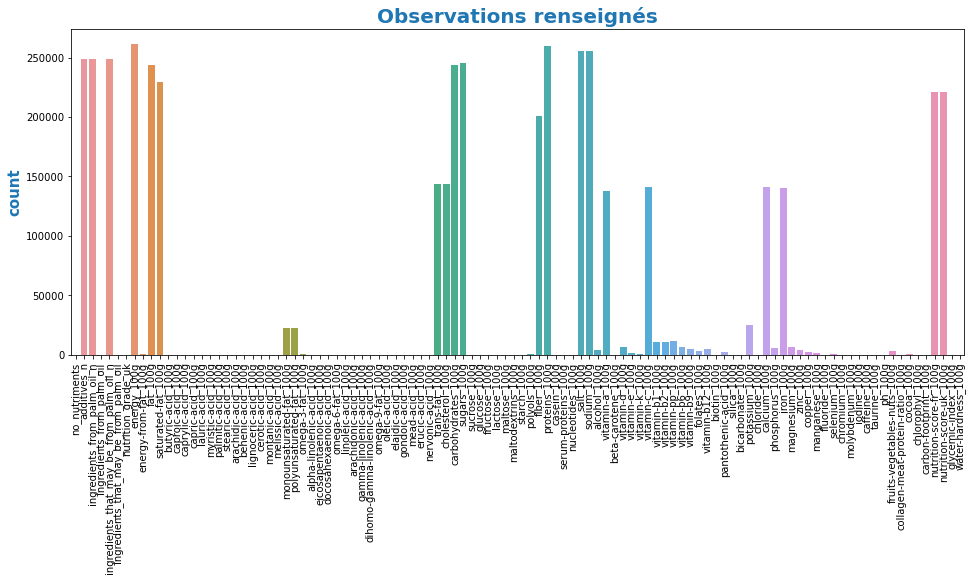

In [4]:
#method avec objet pyplot

plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plt.title("Observations renseignés", fontsize=20, color='tab:blue', fontweight="bold")
plt.ylabel("Nombre observation", size = 15,color='tab:blue', fontweight="bold")
sns.countplot(data=df)



In [5]:
#Nombre de valeurs non nul:
val_ok = df.notnull().sum().sum()
print(val_ok)

12356475


In [6]:
#Nombre de valeurs nul:
val_nok = df.isnull().sum().sum()
print(val_nok)

39608589


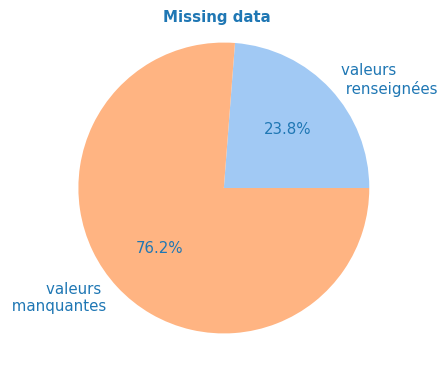

In [7]:
fig , ax = plt.subplots(figsize =(6,6))

colors = sns.color_palette('pastel')

fig.suptitle("Missing data", fontsize=15, color='tab:blue', fontweight="bold", y =0.90)
fig.tight_layout()

labels = ['valeurs \n renseignées', 'valeurs \n manquantes']

ax.pie([val_ok, val_nok],colors = colors, labels = labels, shadow = False,
       autopct='%1.1f%%', textprops={'fontsize': 15,'color':"tab:blue"})


ax.explode = (0.1, 0.1)


path_complet = os.path.join(graph_path, "missing_data_pie1.jpg")
plt.savefig(path_complet, dpi=300, bbox_inches='tight')
plt.show()

In [8]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    code                                        320749 non-null  object 
 1    url                                         320749 non-null  object 
 2    creator                                     320770 non-null  object 
 3    created_t                                   320769 non-null  object 
 4    created_datetime                            320763 non-null  object 
 5    last_modified_t                             320772 non-null  object 
 6    last_modified_datetime                      320772 non-null  object 
 7    product_name                                303010 non-null  object 
 8    generic_name                                52795 non-null   object 
 9    quantity                                    104819 non-nu

In [9]:
df.shape

(320772, 162)

## FEATURE ENGENERING

### suppression des champs et des observations vides

In [10]:
df.columns[df.isnull().all()]

Index(['no_nutriments', 'ingredients_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk',
       'butyric-acid_100g', 'caproic-acid_100g', 'lignoceric-acid_100g',
       'cerotic-acid_100g', 'melissic-acid_100g', 'elaidic-acid_100g',
       'mead-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g',
       'chlorophyl_100g', 'glycemic-index_100g', 'water-hardness_100g'],
      dtype='object')

In [11]:
len(df.columns[df.isnull().all()])

16

In [12]:
#Liste des champs qui n'ont aucune valeur renseignée
#On supprime ces données
df = df.dropna(axis = 'columns', how ='all')
df = df.dropna(axis = 'rows', how = 'all')
df.shape

(320772, 146)

### Suppressions des champs non pertinents

In [13]:
#Liste des champs qui n'apportent aucune information pertinente
liste_col_a_supprimer = ["url", "creator", "created_t", "created_datetime", "last_modified_t",
                         "last_modified_datetime","packaging" , "packaging_tags", "emb_codes", 
                         "emb_codes_tags", "first_packaging_code_geo","manufacturing_places",
                         "manufacturing_places_tags", "cities", "cities_tags","purchase_places",
                         "stores", "image_url", "image_small_url", "ingredients_that_may_be_from_palm_oil_tags",
                         "ingredients_from_palm_oil_tags"]
#liste des champs qualitatifs qui apportent une information deja contenu dans d'autres champs.
liste_champs_doublon = ['quantity' , 'brands' , 'categories' , 'categories_fr' , 
                        'countries_tags','countries_fr' , 'allergens_fr' , 'generic_name' , 'traces' ,
                        'traces_tags' , 'origins_tags' , 'additives' , 'additives_fr', 'labels' ,
                        'labels_fr', 'main_category' , 'states' , 'states_fr']

In [14]:
def del_col(liste_col_a_supprimer):
    df.drop(liste_col_a_supprimer, axis = 1, inplace = True)

In [15]:
del_col(liste_col_a_supprimer)

In [16]:
df.shape

(320772, 125)

In [17]:
del_col(liste_champs_doublon)

In [18]:
df.shape

(320772, 107)

### Suppression des doublons

In [19]:
#unicité et supression des doublons dans les champs qualitatifs:
#Pour l'unicité j ai travaillé sur le champs "code", et sur le champs "product_name x brand"
def sup_doublon_nan():
    #en cas de doublons nous gardons les observations ou les champs sont le mieux renseignés.
    #creation du champ 'nbre_obs_notnull'
    df['nbre_observation_notnull']= df.notnull().sum(axis = 1)
    df_temp = df.sort_values(by = ['nbre_observation_notnull'], ascending = False)
    
    #creation du champ 'product name x brands'
    df['product_name x brands'] = df['product_name'].map(str) + " " + df['brands_tags'].map(str)
    
    #suppression des duplicates et des nan dans 'code'
    df.drop_duplicates(subset = 'code' , keep = 'first', inplace=True)
    df.dropna(axis = 0, subset=['code'], inplace = True)
    
    
    #supression des doublons et nan dans ''
    df.drop_duplicates(subset = 'product_name x brands', keep = 'first', inplace = True)
    df.dropna(axis = 0, subset =['product_name'], inplace = True )
    
    df.drop(['product_name x brands'], axis = 1, inplace = True)

In [20]:
sup_doublon_nan()

In [21]:
df.shape

(281657, 108)

### Supression des observation ou le  "champ nutrition-score" est non renseigné

In [22]:
df = df.drop(df[df['nutrition-score-uk_100g'].isna()].index)

In [23]:
df = df.drop(df[df['nutrition-score-fr_100g'].isna()].index)

In [24]:
df.shape

(203026, 108)

# Netoyage des champs de types Qualitatives

In [25]:
#Le critère utilisés ici est le nombre de catégories
#une difference d'orthographes ou de syntaxes lors de la saisie peuvent gonfler le nombre de catégories d'un champ.
df_nunique_avant = df.select_dtypes(include = ('object'))
df_nunique_avant.nunique()
serie_avant = pd.Series(df_nunique_avant.nunique())

## Countries

In [26]:
df['countries'].nunique()

813

In [27]:
tt.transform_text(df, 'countries') 


#importation database avec les differentes monenclatures des codes pays
nom_fichier = 'country_name.csv'
PATH_DIRECTORY ='/home/bryan/OpenClassRoom/Projet_1/data'
PATH_COMPLET = os.path.join(PATH_DIRECTORY, nom_fichier)
df_country_name = pd.read_csv(PATH_COMPLET, index_col = 0)
for champ in df_country_name.columns:
    tt.transform_text(df_country_name, champ)

#Ajouts manuels
df_country_name = df_country_name.append({'code' : 'uk',
                                          'country_name' : 'united kingdom',
                                          'country_name_fr' : 'royaume-uni'} , ignore_index=True)
df_country_name = df_country_name.append({'code' : 'usa',
                                          'country_name' : 'united states',
                                          'country_name_fr' : 'etats-unis'} , ignore_index=True)

#creation de la liste contenant tous les code pays:
liste_code_country = df_country_name['code'].to_list()
#creation d'une liste contenant tous les noms des pays en francais
liste_country_fr = df_country_name['country_name_fr'].to_list()
#creation d'un dictionnaire contenant la clé : 'code', et la valeur 'country_name'
dic_code_country_name = df_country_name[['code', 'country_name']].set_index('code').T.to_dict('list')
#creation d'un dictionnaire contenant la clé : 'country_name_fr', et la valeur 'country_name'
dic_country_name = df_country_name[['country_name_fr', 'country_name']].set_index('country_name_fr').T.to_dict('list')

#Uniformisation des noms des pays
df['countries'] = df['countries'].apply(tt.transform_to_list)
#on remplace le code pays ou le nom fr par le nom international
for liste in (df['countries']):
    for count, pays in enumerate(liste):
        if pays in liste_country_fr:
            new_name = dic_country_name[pays][0]
            liste[count] = new_name
        if pays in liste_code_country:
            new_name = dic_code_country_name[pays][0]
            liste[count] = new_name
            
df['countries'] = df['countries'].apply(tt.inv_liste_transform)

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: DataFrame columns are not unique, some columns will be omitted.


In [28]:
df['countries'].nunique()

595

In [29]:
df_object = df.select_dtypes(include =['object'])
df_object.columns

Index(['code', 'product_name', 'brands_tags', 'categories_tags', 'origins',
       'labels_tags', 'countries', 'ingredients_text', 'allergens',
       'traces_fr', 'serving_size', 'additives_tags', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states_tags', 'main_category_fr'],
      dtype='object')

In [30]:
liste_champ = ['code', 'product_name', 'brands_tags', 'categories_tags', 'origins',
               'labels_tags','ingredients_text','traces_fr', 'serving_size',
               'additives_tags', 'nutrition_grade_fr','additives_tags',
               'pnns_groups_1', 'pnns_groups_2', 'states_tags', 'main_category_fr']

In [31]:
#petit bug dans ma fonction les observations 'NaN' sont transformé en string 'nan'
df['pnns_groups_1'] = df['pnns_groups_1'].fillna('unknown')
df['pnns_groups_2'] = df['pnns_groups_2'].fillna('unknown')
for champ in liste_champ:
    tt.transform_text(df, champ)
    tt.sup_carac_speciaux(df, champ)

In [32]:
df.select_dtypes(include='object').nunique()

code                  203026
product_name          152692
brands_tags            34537
categories_tags        14305
origins                 2645
labels_tags            10045
countries                595
ingredients_text      151868
allergens              11325
traces_fr               2902
serving_size           21628
additives_tags         28216
nutrition_grade_fr         5
pnns_groups_1             10
pnns_groups_2             37
states_tags              365
main_category_fr        1900
dtype: int64

#### Manipulation de la base pour la creation de graphiques

In [33]:
data = [(pd.Series(df_nunique_avant.nunique()).values),(pd.Series(df.select_dtypes(include='object').nunique()).values)]
index = ['Avant_Transformation','Apres_Transformation']
columns = [df.select_dtypes(include='object').columns]
df_unicite = pd.DataFrame(data=data,index=index,columns=columns)
df_unicite

,code,product_name,brands_tags,categories_tags,origins,labels_tags,countries,ingredients_text,allergens,traces_fr,serving_size,additives_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_tags,main_category_fr
Avant_Transformation,203026,160210,34953,14349,3037,10072,813,155700,11325,2927,22251,33179,5,14,42,365,1948
Apres_Transformation,203026,152692,34537,14305,2645,10045,595,151868,11325,2902,21628,28216,5,10,37,365,1900


In [34]:
df_unicite_avant=pd.DataFrame({
    "Champs" :df.select_dtypes(include='object').columns,
    "Valeur" : pd.Series(df_nunique_avant.nunique()).values
})
df_unicite_avant.loc[:,'transformation'] = 'Avant'

In [35]:
 df_unicite_apres=pd.DataFrame({
    "Champs" :df.select_dtypes(include='object').columns,  
    "Valeur" : pd.Series(df.select_dtypes(include='object').nunique()).values
})
df_unicite_apres.loc[:,'transformation'] = 'Apres'

In [36]:
df_comparaison = pd.concat([df_unicite_avant, df_unicite_apres])
df_comparaison

,Champs,Valeur,transformation
0,code,203026,Avant
1,product_name,160210,Avant
2,brands_tags,34953,Avant
3,categories_tags,14349,Avant
4,origins,3037,Avant
5,labels_tags,10072,Avant
6,countries,813,Avant
7,ingredients_text,155700,Avant
8,allergens,11325,Avant
9,traces_fr,2927,Avant


In [37]:
df_comparaison_sup = df_comparaison[df_comparaison['Valeur']>35000].sort_values(by='Valeur', ascending = False)
df_comparaison_mid1 = df_comparaison[(df_comparaison['Valeur']<35000) & (df_comparaison['Valeur']>8000)].sort_values(by='Valeur', ascending = False)
df_comparaison_mid2 = df_comparaison[(df_comparaison['Valeur']<8000) & (df_comparaison['Valeur']>300)].sort_values(by='Valeur', ascending = False)
df_comparaison_low = df_comparaison[df_comparaison['Valeur']<300].sort_values(by='Valeur', ascending = False)

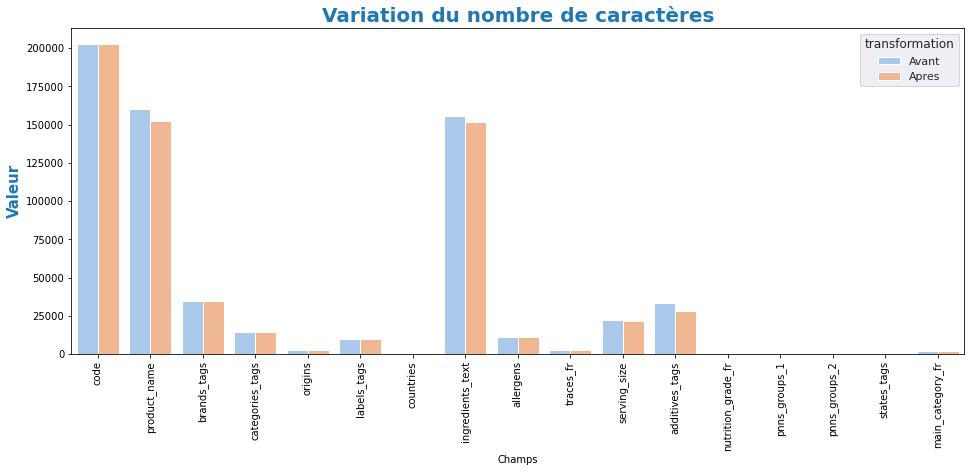

In [38]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
sns.set_theme(palette="pastel")
plt.title("Variation du nombre de caractères", fontsize=20, color='tab:blue', fontweight="bold")
plt.ylabel("Unicité", size = 15,color='tab:blue', fontweight="bold")
sns.barplot(data=df_comparaison, x = 'Champs', y= 'Valeur', hue = 'transformation')

path_complet = os.path.join(graph_path, "variation_nbre_caracteres_full.jpg")
plt.savefig(path_complet, dpi=300, bbox_inches='tight')

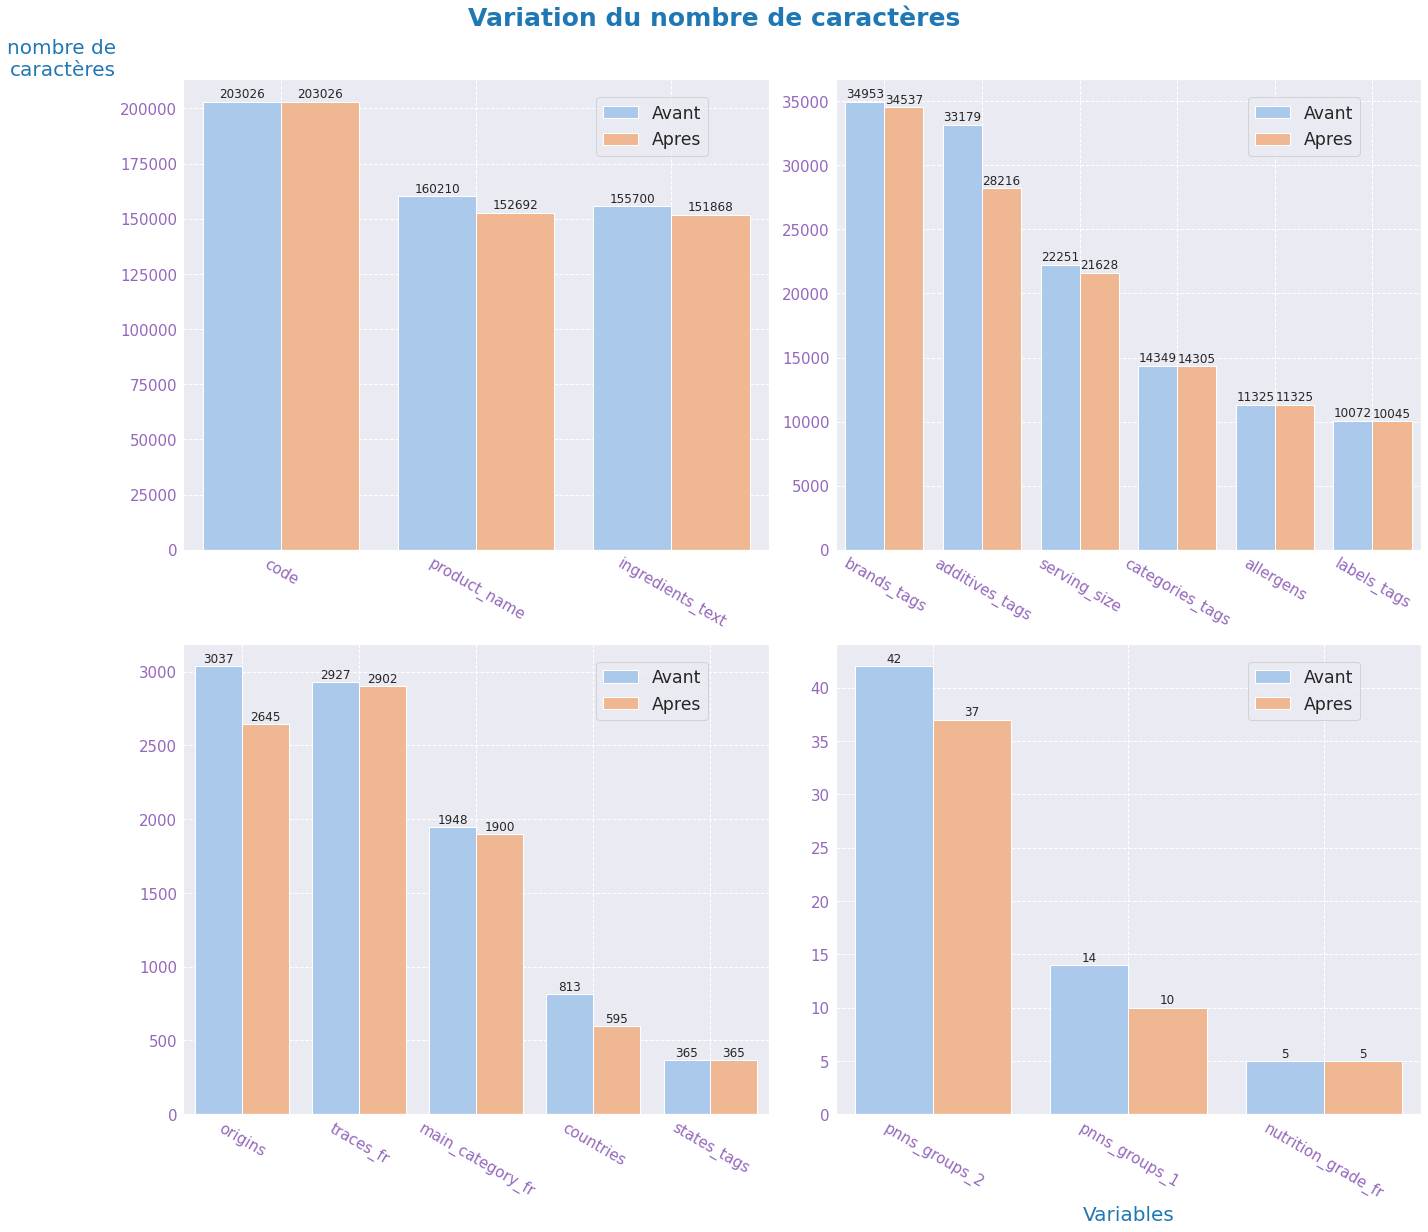

In [39]:
sns.set_theme(palette='pastel')
fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2,figsize = (20, 18))


g1 = sns.barplot(data=df_comparaison_sup, x = 'Champs', y= 'Valeur', hue = 'transformation', ax=ax1)
g2 = sns.barplot(data=df_comparaison_mid1, x = 'Champs', y= 'Valeur', hue = 'transformation', ax=ax2)
g3 = sns.barplot(data=df_comparaison_mid2, x = 'Champs', y= 'Valeur', hue = 'transformation', ax=ax3)
g4 = sns.barplot(data=df_comparaison_low, x = 'Champs', y= 'Valeur', hue = 'transformation', ax=ax4)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel("Variables", size = 20,color ='tab:blue')
    ax.set_ylabel("nombre de\ncaractères",loc = 'top', size = 20,color ='tab:blue', rotation = 0)
    ax.legend(loc='center', bbox_to_anchor=(0.8, 0.9), fontsize ='x-large')
    ax.tick_params(pad = 0, labelsize=15, colors='tab:purple')
    ax.grid(linestyle='--', linewidth=1)
    
    for container in ax.containers:
        ax.bar_label(container, padding=1)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(-30)

ax1.set_xlabel(None)
ax2.set_xlabel(None)
ax3.set_xlabel(None)
ax2.set_ylabel(None)
ax3.set_ylabel(None)
ax4.set_ylabel(None)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Variation du nombre de caractères", fontsize=25, color='tab:blue', fontweight="bold")
plt.show()

path_complet = os.path.join(graph_path, "variation_de_caractere_zoom.jpg")
fig.savefig(path_complet, dpi=300, bbox_inches='tight')


#### Supression des doublons qui on peut apparaitre apres la standardisation des données

In [40]:
sup_doublon_nan()

In [41]:
df.shape

(200966, 108)

## Detection des outliers - IQR (intervalle interquartile)

In [42]:
df_float = df.select_dtypes(include='float')
df_float = df_float.drop(columns =['additives_n','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n'])

## remplacement des outliers par 'Pnns_groups_2'.mean()

In [43]:
df['pnns_groups_1'].value_counts()

unknown                    154178
sugary snacks                9282
milk and dairy products      6465
cereals and potatoes         6339
composite foods              5370
beverages                    5016
fish meat eggs               4949
fruits and vegetables        3881
fat and sauces               3324
salty snacks                 2162
Name: pnns_groups_1, dtype: int64

In [44]:
df['pnns_groups_2'].value_counts()

unknown                             154078
one dish meals                        4329
biscuits and cakes                    3684
cereals                               3117
sweets                                2893
cheese                                2773
milk and yogurt                       2440
chocolate products                    2323
dressings and sauces                  2288
processed meat                        2177
vegetables                            2046
fish and seafood                      1692
non sugared beverages                 1689
appetizers                            1683
fruit juices                          1465
bread                                 1396
sweetened beverages                   1389
breakfast cereals                     1160
fruits                                1118
fats                                  1036
meat                                   933
dairy desserts                         661
sandwich                               613
ice cream  

In [45]:
df.reset_index(inplace=True, drop=True)

In [46]:
pnns_groups_2_cat = df.groupby('pnns_groups_2')

In [47]:
df_cat_unknown = pnns_groups_2_cat.get_group('unknown')
len(df_cat_unknown)

154078

In [48]:
len(df_cat_unknown)

154078

In [49]:
len(df_cat_unknown[df_cat_unknown['salt_100g']<3.42])

145432

In [50]:
df_cat_unknown['salt_100g'].describe()

count    154009.000000
mean          1.918146
std         164.420780
min           0.000000
25%           0.120000
50%           0.700000
75%           1.440180
max       64312.800000
Name: salt_100g, dtype: float64

In [51]:
#creation de Dataframe pour recuperer le nombre d'outlier:
df_outlier = pd.DataFrame(index = pnns_groups_2_cat.groups, columns = df_float.columns)

In [52]:
for cat in pnns_groups_2_cat.groups:
    df_cat = pnns_groups_2_cat.get_group(cat)
    for champ in df_float.columns:
        nombre_outlier = 0
        #on verifie que le cat du champ considéré ne soit pas nul
        if df_cat[champ].notna().sum() > 0:
            
            moy_cat = df_cat[champ].mean()
            print(f" \ncategorie = {cat}, champ = {champ} la moyenne est de {moy_cat}")
            
            #Utilisation de la methode IQR pour definir les outliers
            Q1 = np.percentile(df_cat[champ][df_cat[champ].notna()],25)
            Q3 = np.percentile(df_cat[champ][df_cat[champ].notna()],75)
            IQR = Q3 - Q1
            print('IQR =',IQR)
            
            #remplacement des outliers sup
            print('IQR_sup =' ,Q3+1.5*IQR)
            idx_sup = np.where((df_cat[champ]> (Q3+1.5*IQR))&(df[champ].notna()))
           
            #remplacement des outliers
            df[champ].loc[idx_sup] = moy_cat
            
            
            #remplacement des outliers inf
            print('IQR_inf =' ,Q1-1.5*IQR)
            idx_inf = np.where((df_cat[champ]<(Q1-1.5*IQR))&(df[champ].notna()))
            
            #remplacement des outliers
            df[champ].loc[idx_inf] = moy_cat
            
            
            #mise a jour de df_outlier
            nbre_outlier = len(idx_sup[0]) + len(idx_inf[0])
            df_outlier.loc[cat,champ] = nbre_outlier
            print("nbre_outlier = ",nbre_outlier )
            

 
categorie = alcoholic beverages, champ = energy_100g la moyenne est de 290.28846153846155
IQR = 105.0
IQR_sup = 400.5
IQR_inf = -19.5


/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


nbre_outlier =  8
 
categorie = alcoholic beverages, champ = fat_100g la moyenne est de 1.5552941176470587
IQR = 0.1
IQR_sup = 0.25
IQR_inf = -0.15000000000000002
nbre_outlier =  7
 
categorie = alcoholic beverages, champ = saturated-fat_100g la moyenne est de 0.5476923076923076
IQR = 0.085
IQR_sup = 0.21250000000000002
IQR_inf = -0.1275
nbre_outlier =  7
 
categorie = alcoholic beverages, champ = carbohydrates_100g la moyenne est de 6.700882352941176
IQR = 4.175
IQR_sup = 12.9375
IQR_inf = -3.7624999999999993
nbre_outlier =  4
 
categorie = alcoholic beverages, champ = sugars_100g la moyenne est de 2.9538653846153853
IQR = 2.775
IQR_sup = 7.0375
IQR_inf = -4.0625
nbre_outlier =  6
 
categorie = alcoholic beverages, champ = fiber_100g la moyenne est de 0.21305555555555555
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  4
 
categorie = alcoholic beverages, champ = proteins_100g la moyenne est de 0.45751923076923073
IQR = 0.49925
IQR_sup = 1.248875
IQR_inf = -0.748125
nbre_outlier 

nbre_outlier =  0
 
categorie = appetizers, champ = nutrition-score-fr_100g la moyenne est de 12.994652406417112
IQR = 7.0
IQR_sup = 26.5
IQR_inf = -1.5
nbre_outlier =  41
 
categorie = appetizers, champ = nutrition-score-uk_100g la moyenne est de 12.994652406417112
IQR = 7.0
IQR_sup = 26.5
IQR_inf = -1.5
nbre_outlier =  41
 
categorie = artificially sweetened beverages, champ = energy_100g la moyenne est de 111.18979381443295
IQR = 77.225
IQR_sup = 197.83749999999998
IQR_inf = -111.06249999999999
nbre_outlier =  14
 
categorie = artificially sweetened beverages, champ = fat_100g la moyenne est de 0.1315721649484536
IQR = 0.1
IQR_sup = 0.25
IQR_inf = -0.15000000000000002
nbre_outlier =  25
 
categorie = artificially sweetened beverages, champ = saturated-fat_100g la moyenne est de 0.04857216494845358
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  40
 
categorie = artificially sweetened beverages, champ = monounsaturated-fat_100g la moyenne est de 0.4
IQR = 0.0
IQR_sup = 0.4
IQR_

nbre_outlier =  6
 
categorie = biscuits and cakes, champ = monounsaturated-fat_100g la moyenne est de 8.174628070175439
IQR = 5.95
IQR_sup = 19.925
IQR_inf = -3.875000000000001
nbre_outlier =  0
 
categorie = biscuits and cakes, champ = polyunsaturated-fat_100g la moyenne est de 2.8526133928571413
IQR = 2.1999999999999997
IQR_sup = 6.975
IQR_inf = -1.8249999999999997
nbre_outlier =  7
 
categorie = biscuits and cakes, champ = omega-3-fat_100g la moyenne est de 1.3666666666666665
IQR = 0.55
IQR_sup = 2.4250000000000003
IQR_inf = 0.22499999999999998
nbre_outlier =  0
 
categorie = biscuits and cakes, champ = alpha-linolenic-acid_100g la moyenne est de 2.165
IQR = 0.36499999999999977
IQR_sup = 2.8949999999999996
IQR_inf = 1.4350000000000003
nbre_outlier =  0
 
categorie = biscuits and cakes, champ = omega-6-fat_100g la moyenne est de 0.4
IQR = 0.0
IQR_sup = 0.4
IQR_inf = 0.4
nbre_outlier =  0
 
categorie = biscuits and cakes, champ = omega-9-fat_100g la moyenne est de 7.7
IQR = 0.0
IQR_s

nbre_outlier =  5
 
categorie = bread, champ = polyunsaturated-fat_100g la moyenne est de 1.7303880597014927
IQR = 1.24
IQR_sup = 3.86
IQR_inf = -1.0999999999999999
nbre_outlier =  4
 
categorie = bread, champ = omega-3-fat_100g la moyenne est de 1.3145714285714285
IQR = 0.965
IQR_sup = 3.1174999999999997
IQR_inf = -0.7425
nbre_outlier =  0
 
categorie = bread, champ = alpha-linolenic-acid_100g la moyenne est de 1.2145
IQR = 0.7855000000000001
IQR_sup = 2.7855000000000003
IQR_inf = -0.35650000000000026
nbre_outlier =  0
 
categorie = bread, champ = docosahexaenoic-acid_100g la moyenne est de 0.162
IQR = 0.0
IQR_sup = 0.162
IQR_inf = 0.162
nbre_outlier =  0
 
categorie = bread, champ = omega-6-fat_100g la moyenne est de 1.0
IQR = 0.0
IQR_sup = 1.0
IQR_inf = 1.0
nbre_outlier =  0
 
categorie = bread, champ = trans-fat_100g la moyenne est de 0.023636363636363636
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  6
 
categorie = bread, champ = cholesterol_100g la moyenne est de 0.001496

nbre_outlier =  0
 
categorie = breakfast cereals, champ = cholesterol_100g la moyenne est de 0.0
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  0
 
categorie = breakfast cereals, champ = carbohydrates_100g la moyenne est de 68.16085354896674
IQR = 14.5
IQR_sup = 97.75
IQR_inf = 39.75
nbre_outlier =  9
 
categorie = breakfast cereals, champ = sugars_100g la moyenne est de 19.95280414150133
IQR = 12.600000000000001
IQR_sup = 45.5
IQR_inf = -4.900000000000002
nbre_outlier =  4
 
categorie = breakfast cereals, champ = starch_100g la moyenne est de 45.105000000000004
IQR = 13.125
IQR_sup = 69.6875
IQR_inf = 17.1875
nbre_outlier =  1
 
categorie = breakfast cereals, champ = polyols_100g la moyenne est de 5.1800000000000015
IQR = 3.1999999999999997
IQR_sup = 11.1
IQR_inf = -1.6999999999999997
nbre_outlier =  0
 
categorie = breakfast cereals, champ = fiber_100g la moyenne est de 7.1683377777777855
IQR = 3.9299999999999997
IQR_sup = 14.825
IQR_inf = -0.8949999999999996
nbre_outlier =  

nbre_outlier =  0
 
categorie = cereals, champ = omega-6-fat_100g la moyenne est de 5.449999999999999
IQR = 0.14999999999999947
IQR_sup = 5.749999999999998
IQR_inf = 5.15
nbre_outlier =  0
 
categorie = cereals, champ = linoleic-acid_100g la moyenne est de 1.3599999999999999
IQR = 0.94
IQR_sup = 3.2399999999999998
IQR_inf = -0.52
nbre_outlier =  0
 
categorie = cereals, champ = trans-fat_100g la moyenne est de 1.2577319587628866e-05
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  1
 
categorie = cereals, champ = cholesterol_100g la moyenne est de 0.0032710569105691054
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  28
 
categorie = cereals, champ = carbohydrates_100g la moyenne est de 57.65076999668148
IQR = 31.0
IQR_sup = 119.5
IQR_inf = -4.5
nbre_outlier =  0
 
categorie = cereals, champ = sugars_100g la moyenne est de 3.5970484264611473
IQR = 2.6
IQR_sup = 7.4
IQR_inf = -3.0000000000000004
nbre_outlier =  199
 
categorie = cereals, champ = glucose_100g la moyenne est de 

nbre_outlier =  0
 
categorie = cheese, champ = carbohydrates_100g la moyenne est de 2.0458892694064024
IQR = 2.8
IQR_sup = 7.199999999999999
IQR_inf = -3.999999999999999
nbre_outlier =  105
 
categorie = cheese, champ = sugars_100g la moyenne est de 1.5834374458874432
IQR = 2.4
IQR_sup = 6.1
IQR_inf = -3.4999999999999996
nbre_outlier =  103
 
categorie = cheese, champ = lactose_100g la moyenne est de 0.07928571428571428
IQR = 0.0
IQR_sup = 0.1
IQR_inf = 0.1
nbre_outlier =  3
 
categorie = cheese, champ = starch_100g la moyenne est de 0.5
IQR = 0.0
IQR_sup = 0.5
IQR_inf = 0.5
nbre_outlier =  0
 
categorie = cheese, champ = fiber_100g la moyenne est de 0.1565871848739494
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  216
 
categorie = cheese, champ = proteins_100g la moyenne est de 17.85841269841274
IQR = 12.149999999999999
IQR_sup = 41.75
IQR_inf = -6.849999999999998
nbre_outlier =  11
 
categorie = cheese, champ = salt_100g la moyenne est de 1.3864108214646393
IQR = 0.970000000

nbre_outlier =  17
 
categorie = chocolate products, champ = vitamin-b1_100g la moyenne est de 0.0006131818181818184
IQR = 0.00022249999999999993
IQR_sup = 0.00105625
IQR_inf = 0.0001662500000000001
nbre_outlier =  3
 
categorie = chocolate products, champ = vitamin-b2_100g la moyenne est de 0.000818888888888889
IQR = 0.001
IQR_sup = 0.0029
IQR_inf = -0.0011
nbre_outlier =  0
 
categorie = chocolate products, champ = vitamin-pp_100g la moyenne est de 0.011505882352941177
IQR = 0.004900000000000002
IQR_sup = 0.023250000000000003
IQR_inf = 0.003649999999999997
nbre_outlier =  2
 
categorie = chocolate products, champ = vitamin-b6_100g la moyenne est de 0.0009277777777777778
IQR = 0.0
IQR_sup = 0.0009
IQR_inf = 0.0009
nbre_outlier =  7
 
categorie = chocolate products, champ = vitamin-b9_100g la moyenne est de 0.0001201764705882353
IQR = 4.000000000000002e-06
IQR_sup = 0.000127
IQR_inf = 0.00011099999999999999
nbre_outlier =  6
 
categorie = chocolate products, champ = vitamin-b12_100g la

nbre_outlier =  0
 
categorie = dairy desserts, champ = cocoa_100g la moyenne est de 32.5
IQR = 2.5
IQR_sup = 37.5
IQR_inf = 27.5
nbre_outlier =  0
 
categorie = dairy desserts, champ = nutrition-score-fr_100g la moyenne est de 6.270801815431165
IQR = 6.0
IQR_sup = 18.0
IQR_inf = -6.0
nbre_outlier =  12
 
categorie = dairy desserts, champ = nutrition-score-uk_100g la moyenne est de 6.273827534039334
IQR = 6.0
IQR_sup = 18.0
IQR_inf = -6.0
nbre_outlier =  12
 
categorie = dressings and sauces, champ = energy_100g la moyenne est de 918.1807915567282
IQR = 950.75
IQR_sup = 2715.125
IQR_inf = -1087.875
nbre_outlier =  122
 
categorie = dressings and sauces, champ = energy-from-fat_100g la moyenne est de 784.8857142857142
IQR = 1390.0
IQR_sup = 3475.0
IQR_inf = -2085.0
nbre_outlier =  0
 
categorie = dressings and sauces, champ = fat_100g la moyenne est de 18.02369926199255
IQR = 28.025
IQR_sup = 70.8625
IQR_inf = -41.2375
nbre_outlier =  130
 
categorie = dressings and sauces, champ = satu

nbre_outlier =  16
 
categorie = dried fruits, champ = sugars_100g la moyenne est de 44.97280701754385
IQR = 28.324999999999996
IQR_sup = 104.0375
IQR_inf = -9.262499999999996
nbre_outlier =  0
 
categorie = dried fruits, champ = fiber_100g la moyenne est de 7.22992673992674
IQR = 3.3000000000000007
IQR_sup = 13.250000000000002
IQR_inf = 0.049999999999998934
nbre_outlier =  29
 
categorie = dried fruits, champ = proteins_100g la moyenne est de 5.473654970760237
IQR = 3.5999999999999996
IQR_sup = 11.0
IQR_inf = -3.3999999999999995
nbre_outlier =  56
 
categorie = dried fruits, champ = salt_100g la moyenne est de 0.21149339415204696
IQR = 0.09000000000000001
IQR_sup = 0.23500000000000001
IQR_inf = -0.125
nbre_outlier =  43
 
categorie = dried fruits, champ = sodium_100g la moyenne est de 0.08325897775935913
IQR = 0.0354330708661418
IQR_sup = 0.09251968503937019
IQR_inf = -0.049212598425197
nbre_outlier =  43
 
categorie = dried fruits, champ = alcohol_100g la moyenne est de 0.0
IQR = 0.0

nbre_outlier =  1
 
categorie = eggs, champ = zinc_100g la moyenne est de 0.0012
IQR = 0.0
IQR_sup = 0.0012
IQR_inf = 0.0012
nbre_outlier =  0
 
categorie = eggs, champ = fruits-vegetables-nuts_100g la moyenne est de 0.0
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  0
 
categorie = eggs, champ = carbon-footprint_100g la moyenne est de 370.1
IQR = 314.9
IQR_sup = 999.8999999999999
IQR_inf = -259.7
nbre_outlier =  0
 
categorie = eggs, champ = nutrition-score-fr_100g la moyenne est de -0.46938775510204084
IQR = 1.0
IQR_sup = 1.5
IQR_inf = -2.5
nbre_outlier =  12
 
categorie = eggs, champ = nutrition-score-uk_100g la moyenne est de -0.46938775510204084
IQR = 1.0
IQR_sup = 1.5
IQR_inf = -2.5
nbre_outlier =  12
 
categorie = fats, champ = energy_100g la moyenne est de 3029.9555555555557
IQR = 484.5
IQR_sup = 4190.75
IQR_inf = 2252.75
nbre_outlier =  177
 
categorie = fats, champ = energy-from-fat_100g la moyenne est de 2828.5
IQR = 450.0
IQR_sup = 4205.0
IQR_inf = 2405.0
nbre_outlie

nbre_outlier =  12
 
categorie = fish and seafood, champ = polyunsaturated-fat_100g la moyenne est de 3.977152777777779
IQR = 2.0
IQR_sup = 7.5
IQR_inf = -0.5
nbre_outlier =  11
 
categorie = fish and seafood, champ = omega-3-fat_100g la moyenne est de 2.439859459459461
IQR = 1.2000000000000002
IQR_sup = 4.5
IQR_inf = -0.30000000000000027
nbre_outlier =  19
 
categorie = fish and seafood, champ = alpha-linolenic-acid_100g la moyenne est de 0.5
IQR = 0.14
IQR_sup = 0.55
IQR_inf = -0.010000000000000009
nbre_outlier =  1
 
categorie = fish and seafood, champ = eicosapentaenoic-acid_100g la moyenne est de 0.5762083333333332
IQR = 0.50525
IQR_sup = 1.4631249999999998
IQR_inf = -0.5578749999999999
nbre_outlier =  1
 
categorie = fish and seafood, champ = docosahexaenoic-acid_100g la moyenne est de 0.8046428571428572
IQR = 0.5
IQR_sup = 1.75
IQR_inf = -0.25
nbre_outlier =  1
 
categorie = fish and seafood, champ = omega-6-fat_100g la moyenne est de 0.9257142857142858
IQR = 0.685
IQR_sup = 2.2

nbre_outlier =  5
 
categorie = fruit juices, champ = salt_100g la moyenne est de 0.0573333195355197
IQR = 0.025
IQR_sup = 0.0625
IQR_inf = -0.037500000000000006
nbre_outlier =  80
 
categorie = fruit juices, champ = sodium_100g la moyenne est de 0.022572534206789764
IQR = 0.0098425196850393
IQR_sup = 0.02460629921259825
IQR_inf = -0.01476377952755895
nbre_outlier =  80
 
categorie = fruit juices, champ = alcohol_100g la moyenne est de 0.0
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  0
 
categorie = fruit juices, champ = vitamin-a_100g la moyenne est de 0.00013443529411764712
IQR = 0.00010000000000000002
IQR_sup = 0.00031000000000000005
IQR_inf = -9.000000000000002e-05
nbre_outlier =  5
 
categorie = fruit juices, champ = beta-carotene_100g la moyenne est de 0.0016150000000000001
IQR = 0.000915
IQR_sup = 0.003445
IQR_inf = -0.0002149999999999999
nbre_outlier =  0
 
categorie = fruit juices, champ = vitamin-d_100g la moyenne est de 4.17e-06
IQR = 0.0
IQR_sup = 4.17e-06
IQR_inf 

nbre_outlier =  13
 
categorie = fruit nectars, champ = carbon-footprint_100g la moyenne est de 165.33333333333334
IQR = 103.0
IQR_sup = 355.5
IQR_inf = -56.5
nbre_outlier =  0
 
categorie = fruit nectars, champ = nutrition-score-fr_100g la moyenne est de 13.164874551971327
IQR = 3.0
IQR_sup = 19.5
IQR_inf = 7.5
nbre_outlier =  25
 
categorie = fruit nectars, champ = nutrition-score-uk_100g la moyenne est de 1.2616487455197132
IQR = 1.0
IQR_sup = 3.5
IQR_inf = -0.5
nbre_outlier =  20
 
categorie = fruits, champ = energy_100g la moyenne est de 431.6133720930232
IQR = 84.0
IQR_sup = 453.0
IQR_inf = 117.0
nbre_outlier =  181
 
categorie = fruits, champ = energy-from-fat_100g la moyenne est de 0.0
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  0
 
categorie = fruits, champ = fat_100g la moyenne est de 1.653636415633935
IQR = 0.4
IQR_sup = 1.1
IQR_inf = -0.5000000000000001
nbre_outlier =  63
 
categorie = fruits, champ = saturated-fat_100g la moyenne est de 1.1477100715563526
IQR = 0

nbre_outlier =  3
 
categorie = ice cream, champ = salt_100g la moyenne est de 0.18154133186440677
IQR = 0.09182499999999999
IQR_sup = 0.3177375
IQR_inf = -0.04956249999999998
nbre_outlier =  40
 
categorie = ice cream, champ = sodium_100g la moyenne est de 0.07147295729347396
IQR = 0.03615688976377955
IQR_sup = 0.12510147637795282
IQR_inf = -0.019526082677165373
nbre_outlier =  40
 
categorie = ice cream, champ = alcohol_100g la moyenne est de 0.225
IQR = 0.125
IQR_sup = 0.3125
IQR_inf = -0.1875
nbre_outlier =  3
 
categorie = ice cream, champ = vitamin-a_100g la moyenne est de 9.824000000000001e-05
IQR = 9.12e-05
IQR_sup = 0.0002728
IQR_inf = -9.199999999999999e-05
nbre_outlier =  0
 
categorie = ice cream, champ = vitamin-d_100g la moyenne est de 1.5e-06
IQR = 0.0
IQR_sup = 1.5e-06
IQR_inf = 1.5e-06
nbre_outlier =  0
 
categorie = ice cream, champ = vitamin-c_100g la moyenne est de 0.0
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  0
 
categorie = ice cream, champ = calcium_1

nbre_outlier =  77
 
categorie = legumes, champ = nutrition-score-uk_100g la moyenne est de -0.5465313028764806
IQR = 7.0
IQR_sup = 11.5
IQR_inf = -16.5
nbre_outlier =  77
 
categorie = meat, champ = energy_100g la moyenne est de 716.1444206008583
IQR = 418.0
IQR_sup = 1522.0
IQR_inf = -150.0
nbre_outlier =  12
 
categorie = meat, champ = energy-from-fat_100g la moyenne est de 241.38888888888889
IQR = 381.5
IQR_sup = 991.25
IQR_inf = -534.75
nbre_outlier =  0
 
categorie = meat, champ = fat_100g la moyenne est de 9.1952417218543
IQR = 12.6
IQR_sup = 33.9
IQR_inf = -16.5
nbre_outlier =  9
 
categorie = meat, champ = saturated-fat_100g la moyenne est de 3.4057564377682463
IQR = 5.0
IQR_sup = 13.3
IQR_inf = -6.7
nbre_outlier =  13
 
categorie = meat, champ = monounsaturated-fat_100g la moyenne est de 5.844444444444445
IQR = 4.975
IQR_sup = 13.6875
IQR_inf = -6.2124999999999995
nbre_outlier =  1
 
categorie = meat, champ = polyunsaturated-fat_100g la moyenne est de 1.7125
IQR = 2.325
IQR_s

nbre_outlier =  64
 
categorie = milk and yogurt, champ = proteins_100g la moyenne est de 3.6857807993407437
IQR = 1.0
IQR_sup = 5.5
IQR_inf = 1.5
nbre_outlier =  177
 
categorie = milk and yogurt, champ = salt_100g la moyenne est de 0.1232298357313557
IQR = 0.03
IQR_sup = 0.175
IQR_inf = 0.05500000000000001
nbre_outlier =  288
 
categorie = milk and yogurt, champ = sodium_100g la moyenne est de 0.04851553541685028
IQR = 0.011811023622047202
IQR_sup = 0.06889763779527551
IQR_inf = 0.021653543307086697
nbre_outlier =  289
 
categorie = milk and yogurt, champ = alcohol_100g la moyenne est de 0.0016666666666666668
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  1
 
categorie = milk and yogurt, champ = vitamin-a_100g la moyenne est de 5.211935483870971e-05
IQR = 6.36e-05
IQR_sup = 0.00015900000000000002
IQR_inf = -9.54e-05
nbre_outlier =  4
 
categorie = milk and yogurt, champ = vitamin-d_100g la moyenne est de 1.7692899408284008e-06
IQR = 5.000000000000001e-07
IQR_sup = 2.0000000000

nbre_outlier =  104
 
categorie = non sugared beverages, champ = sugars_100g la moyenne est de 8.38948468468469
IQR = 8.6
IQR_sup = 22.0
IQR_inf = -12.399999999999999
nbre_outlier =  99
 
categorie = non sugared beverages, champ = sucrose_100g la moyenne est de 0.0
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  0
 
categorie = non sugared beverages, champ = fructose_100g la moyenne est de 33.1
IQR = 30.8
IQR_sup = 94.7
IQR_inf = -28.500000000000004
nbre_outlier =  0
 
categorie = non sugared beverages, champ = lactose_100g la moyenne est de 0.15151515151515152
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  2
 
categorie = non sugared beverages, champ = starch_100g la moyenne est de 1.0
IQR = 0.0
IQR_sup = 1.0
IQR_inf = 1.0
nbre_outlier =  0
 
categorie = non sugared beverages, champ = polyols_100g la moyenne est de 48.0005
IQR = 47.9995
IQR_sup = 143.99949999999998
IQR_inf = -47.99849999999999
nbre_outlier =  0
 
categorie = non sugared beverages, champ = fiber_100g la mo

nbre_outlier =  12
 
categorie = nuts, champ = monounsaturated-fat_100g la moyenne est de 28.550000000000004
IQR = 10.125
IQR_sup = 49.5875
IQR_inf = 9.087499999999999
nbre_outlier =  6
 
categorie = nuts, champ = polyunsaturated-fat_100g la moyenne est de 14.863448275862067
IQR = 5.27
IQR_sup = 22.104999999999997
IQR_inf = 1.0250000000000004
nbre_outlier =  4
 
categorie = nuts, champ = omega-3-fat_100g la moyenne est de 6.03
IQR = 2.795
IQR_sup = 11.9875
IQR_inf = 0.8075000000000001
nbre_outlier =  0
 
categorie = nuts, champ = omega-6-fat_100g la moyenne est de 38.3
IQR = 0.0
IQR_sup = 38.3
IQR_inf = 38.3
nbre_outlier =  0
 
categorie = nuts, champ = trans-fat_100g la moyenne est de 1.0714285714285714
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  1
 
categorie = nuts, champ = cholesterol_100g la moyenne est de 4.259259259259259e-05
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  1
 
categorie = nuts, champ = carbohydrates_100g la moyenne est de 16.91532407407407
IQR = 

nbre_outlier =  257
 
categorie = one dish meals, champ = sodium_100g la moyenne est de 0.3966393458916577
IQR = 0.15748031496063003
IQR_sup = 0.6692913385826771
IQR_inf = 0.03937007874015694
nbre_outlier =  257
 
categorie = one dish meals, champ = alcohol_100g la moyenne est de 0.025806451612903226
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  2
 
categorie = one dish meals, champ = vitamin-a_100g la moyenne est de 8.136333333333333e-05
IQR = 0.000116625
IQR_sup = 0.00029156250000000005
IQR_inf = -0.00017493750000000002
nbre_outlier =  1
 
categorie = one dish meals, champ = beta-carotene_100g la moyenne est de 0.004522
IQR = 0.0
IQR_sup = 0.004522
IQR_inf = 0.004522
nbre_outlier =  0
 
categorie = one dish meals, champ = vitamin-d_100g la moyenne est de 2.1549999999999997e-06
IQR = 1.8449999999999997e-06
IQR_sup = 5.844999999999999e-06
IQR_inf = -1.5349999999999993e-06
nbre_outlier =  0
 
categorie = one dish meals, champ = vitamin-e_100g la moyenne est de 0.0015566666666666

nbre_outlier =  13
 
categorie = pizza pies and quiche, champ = energy_100g la moyenne est de 974.7096018735363
IQR = 156.0
IQR_sup = 1281.0
IQR_inf = 657.0
nbre_outlier =  9
 
categorie = pizza pies and quiche, champ = energy-from-fat_100g la moyenne est de 498.0
IQR = 143.5
IQR_sup = 770.75
IQR_inf = 196.75
nbre_outlier =  0
 
categorie = pizza pies and quiche, champ = fat_100g la moyenne est de 9.880436893203893
IQR = 4.825
IQR_sup = 19.262500000000003
IQR_inf = -0.03750000000000053
nbre_outlier =  3
 
categorie = pizza pies and quiche, champ = saturated-fat_100g la moyenne est de 4.931779859484777
IQR = 2.9000000000000004
IQR_sup = 10.55
IQR_inf = -1.0500000000000007
nbre_outlier =  10
 
categorie = pizza pies and quiche, champ = monounsaturated-fat_100g la moyenne est de 2.082
IQR = 1.0
IQR_sup = 4.1
IQR_inf = 0.10000000000000009
nbre_outlier =  0
 
categorie = pizza pies and quiche, champ = polyunsaturated-fat_100g la moyenne est de 1.264
IQR = 1.0999999999999999
IQR_sup = 3.55
I

nbre_outlier =  0
 
categorie = processed meat, champ = omega-3-fat_100g la moyenne est de 0.6150833333333334
IQR = 0.7335
IQR_sup = 1.90025
IQR_inf = -1.03375
nbre_outlier =  2
 
categorie = processed meat, champ = trans-fat_100g la moyenne est de 0.0
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  0
 
categorie = processed meat, champ = cholesterol_100g la moyenne est de 0.060600000000000015
IQR = 0.030375
IQR_sup = 0.1201875
IQR_inf = -0.0013125000000000012
nbre_outlier =  0
 
categorie = processed meat, champ = carbohydrates_100g la moyenne est de 1.5655457142857114
IQR = 1.2999999999999998
IQR_sup = 3.8499999999999996
IQR_inf = -1.3499999999999996
nbre_outlier =  148
 
categorie = processed meat, champ = sugars_100g la moyenne est de 0.9955868566176481
IQR = 0.6000000000000001
IQR_sup = 2.0
IQR_inf = -0.40000000000000013
nbre_outlier =  201
 
categorie = processed meat, champ = lactose_100g la moyenne est de 0.1
IQR = 0.0
IQR_sup = 0.1
IQR_inf = 0.1
nbre_outlier =  0
 
categ

nbre_outlier =  0
 
categorie = sandwich, champ = iron_100g la moyenne est de 0.0021
IQR = 0.0
IQR_sup = 0.0021
IQR_inf = 0.0021
nbre_outlier =  0
 
categorie = sandwich, champ = fruits-vegetables-nuts_100g la moyenne est de 0.0
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  0
 
categorie = sandwich, champ = nutrition-score-fr_100g la moyenne est de 7.797716150081566
IQR = 10.0
IQR_sup = 27.0
IQR_inf = -13.0
nbre_outlier =  0
 
categorie = sandwich, champ = nutrition-score-uk_100g la moyenne est de 7.797716150081566
IQR = 10.0
IQR_sup = 27.0
IQR_inf = -13.0
nbre_outlier =  0
 
categorie = soups, champ = energy_100g la moyenne est de 171.36818181818182
IQR = 48.75
IQR_sup = 258.125
IQR_inf = 63.125
nbre_outlier =  31
 
categorie = soups, champ = energy-from-fat_100g la moyenne est de 35.0
IQR = 0.0
IQR_sup = 35.0
IQR_inf = 35.0
nbre_outlier =  0
 
categorie = soups, champ = fat_100g la moyenne est de 1.8131589041095884
IQR = 1.2800000000000002
IQR_sup = 4.120000000000001
IQR_inf 

nbre_outlier =  6
 
categorie = sweetened beverages, champ = vitamin-e_100g la moyenne est de 0.00237945945945946
IQR = 0.0002000000000000001
IQR_sup = 0.0023
IQR_inf = 0.0014999999999999998
nbre_outlier =  10
 
categorie = sweetened beverages, champ = vitamin-k_100g la moyenne est de 1.025e-05
IQR = 1.2499999999999999e-06
IQR_sup = 1.275e-05
IQR_inf = 7.75e-06
nbre_outlier =  0
 
categorie = sweetened beverages, champ = vitamin-c_100g la moyenne est de 0.019905555555555565
IQR = 0.015000000000000001
IQR_sup = 0.0465
IQR_inf = -0.013500000000000003
nbre_outlier =  6
 
categorie = sweetened beverages, champ = vitamin-b1_100g la moyenne est de 0.0003176190476190476
IQR = 0.00011000000000000002
IQR_sup = 0.00044000000000000007
IQR_inf = -2.710505431213761e-20
nbre_outlier =  5
 
categorie = sweetened beverages, champ = vitamin-b2_100g la moyenne est de 0.00034120600000000004
IQR = 0.00015499999999999997
IQR_sup = 0.0005974999999999999
IQR_inf = -2.249999999999995e-05
nbre_outlier =  6
 
c

nbre_outlier =  70
 
categorie = sweets, champ = salt_100g la moyenne est de 0.1902841567185872
IQR = 0.125
IQR_sup = 0.3175
IQR_inf = -0.1825
nbre_outlier =  342
 
categorie = sweets, champ = sodium_100g la moyenne est de 0.07491575377688352
IQR = 0.0492125984251969
IQR_sup = 0.12500000000000006
IQR_inf = -0.07185039370078755
nbre_outlier =  342
 
categorie = sweets, champ = alcohol_100g la moyenne est de 0.0909090909090909
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  3
 
categorie = sweets, champ = vitamin-a_100g la moyenne est de 7.092391304347826e-05
IQR = 0.0
IQR_sup = 0.0
IQR_inf = 0.0
nbre_outlier =  8
 
categorie = sweets, champ = vitamin-d_100g la moyenne est de 7.617692307692311e-06
IQR = 2.95e-06
IQR_sup = 8.125000000000001e-06
IQR_inf = -3.675e-06
nbre_outlier =  1
 
categorie = sweets, champ = vitamin-e_100g la moyenne est de 0.005553917857142858
IQR = 0.0033350000000000003
IQR_sup = 0.0120125
IQR_inf = -0.0013274999999999997
nbre_outlier =  0
 
categorie = sweets

IQR_inf = 0.064
nbre_outlier =  0
 
categorie = unknown, champ = monounsaturated-fat_100g la moyenne est de 6.301231034691544
IQR = 8.01
IQR_sup = 20.025
IQR_inf = -12.015
nbre_outlier =  1421
 
categorie = unknown, champ = polyunsaturated-fat_100g la moyenne est de 4.543094897218861
IQR = 5.5
IQR_sup = 13.75
IQR_inf = -8.25
nbre_outlier =  1564
 
categorie = unknown, champ = omega-3-fat_100g la moyenne est de 3.4448900763358767
IQR = 2.1850000000000005
IQR_sup = 5.597500000000001
IQR_inf = -3.142500000000001
nbre_outlier =  18
 
categorie = unknown, champ = alpha-linolenic-acid_100g la moyenne est de 0.3699795918367346
IQR = 0.09725
IQR_sup = 0.297375
IQR_inf = -0.09162500000000001
nbre_outlier =  22
 
categorie = unknown, champ = docosahexaenoic-acid_100g la moyenne est de 0.0601111111111111
IQR = 0.017
IQR_sup = 0.0895
IQR_inf = 0.0215
nbre_outlier =  0
 
categorie = unknown, champ = omega-6-fat_100g la moyenne est de 9.311676470588235
IQR = 13.965
IQR_sup = 36.272499999999994
IQR_i

nbre_outlier =  150
 
categorie = unknown, champ = zinc_100g la moyenne est de 0.005467809062608078
IQR = 0.00635
IQR_sup = 0.017025
IQR_inf = -0.008374999999999999
nbre_outlier =  55
 
categorie = unknown, champ = copper_100g la moyenne est de 0.010401549818181864
IQR = 0.000822
IQR_sup = 0.002233
IQR_inf = -0.0010550000000000002
nbre_outlier =  21
 
categorie = unknown, champ = manganese_100g la moyenne est de 0.0020809926961926767
IQR = 0.002
IQR_sup = 0.005
IQR_inf = -0.003
nbre_outlier =  25
 
categorie = unknown, champ = fluoride_100g la moyenne est de 0.0048708303030303044
IQR = 0.00044
IQR_sup = 0.00112
IQR_inf = -0.0006399999999999999
nbre_outlier =  5
 
categorie = unknown, champ = selenium_100g la moyenne est de 0.0048527550539083485
IQR = 4.4e-05
IQR_sup = 0.000115
IQR_inf = -6.1000000000000005e-05
nbre_outlier =  39
 
categorie = unknown, champ = chromium_100g la moyenne est de 3.322166666666667e-05
IQR = 3.6e-05
IQR_sup = 0.0001006
IQR_inf = -4.34e-05
nbre_outlier =  0
 


IQR_inf = 0.037500000000000006
nbre_outlier =  5
 
categorie = vegetables, champ = zinc_100g la moyenne est de 0.00154
IQR = 0.0
IQR_sup = 0.00154
IQR_inf = 0.00154
nbre_outlier =  0
 
categorie = vegetables, champ = manganese_100g la moyenne est de 9.92e-05
IQR = 0.0
IQR_sup = 9.92e-05
IQR_inf = 9.92e-05
nbre_outlier =  0
 
categorie = vegetables, champ = fruits-vegetables-nuts_100g la moyenne est de 71.286
IQR = 39.125
IQR_sup = 158.6875
IQR_inf = 2.1875
nbre_outlier =  6
 
categorie = vegetables, champ = nutrition-score-fr_100g la moyenne est de -4.724828934506354
IQR = 6.0
IQR_sup = 7.0
IQR_inf = -17.0
nbre_outlier =  25
 
categorie = vegetables, champ = nutrition-score-uk_100g la moyenne est de -4.724828934506354
IQR = 6.0
IQR_sup = 7.0
IQR_inf = -17.0
nbre_outlier =  25


In [53]:
len(df[df['pnns_groups_2']=='unknown'])

154078

In [54]:
df_outlier

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
alcoholic beverages,8,NaN,7,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,11
appetizers,129,0,16,271,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0,41,41
artificially sweetened beverages,14,NaN,25,40,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,1,NaN,NaN,NaN,11,54
biscuits and cakes,166,1,53,6,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,0,NaN,0,0,85,85
bread,2,0,110,189,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,0,0,16,16
breakfast cereals,12,3,1,38,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,0,NaN,0,0,0,0
cereals,536,10,322,453,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,NaN,0,2,292,292
cheese,136,0,270,201,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,1,NaN,NaN,0,300,344
chocolate products,256,6,218,211,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,0,1,68,68
dairy desserts,55,NaN,26,30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,0,NaN,12,12


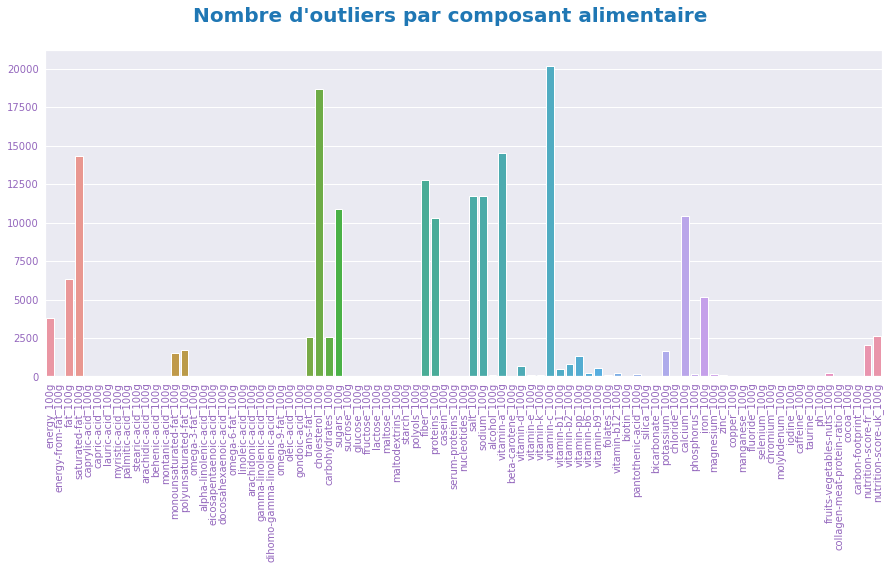

In [55]:
fig , ax = plt.subplots(1,1, figsize =(15,6))
g = sns.barplot(x= df_outlier.columns, y = df_outlier.sum(axis = 0), ax=ax)
ax.tick_params(pad = 0, labelsize=10, colors='tab:purple')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

fig.suptitle("Nombre d'outliers par composant alimentaire",fontsize=20, color='tab:blue', fontweight="bold")

plt.show()

path_complet = os.path.join(graph_path, "N_outlier_composant.jpg")
fig.savefig(path_complet, dpi=300, bbox_inches='tight')


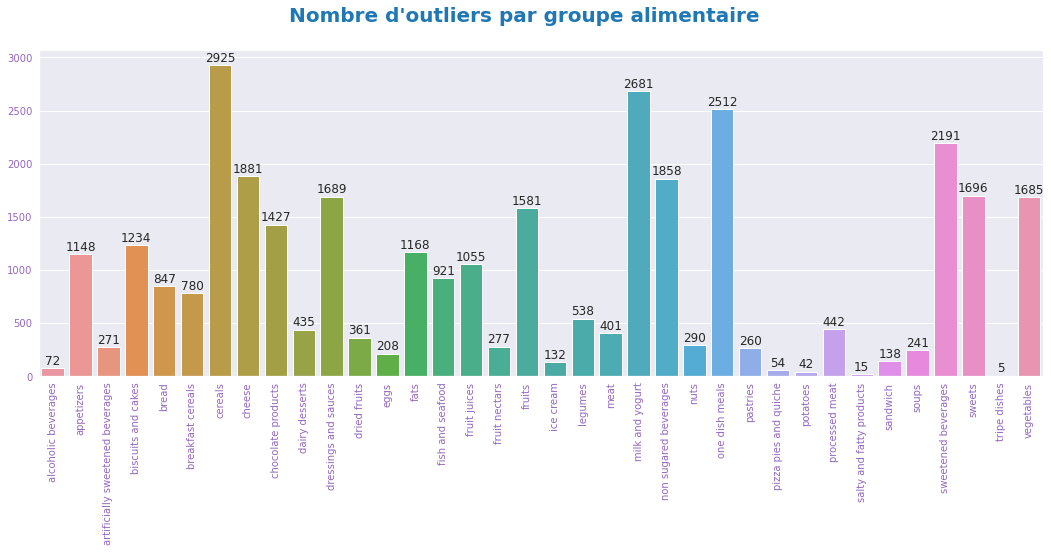

In [56]:

fig , ax = plt.subplots(1,1, figsize =(18,6))
g = sns.barplot(x= df_outlier.drop('unknown', axis = 0).index, y = df_outlier.drop('unknown', axis = 0).sum(axis = 1), ax=ax)
ax.tick_params(pad = 0, labelsize=10, colors='tab:purple')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
for container in ax.containers:
        ax.bar_label(container, padding=1)
        
fig.suptitle("Nombre d'outliers par groupe alimentaire", fontsize=20, color='tab:blue', fontweight="bold")
plt.show()

path_complet = os.path.join(graph_path, 'N_outlier_groupe.jpg')
fig.savefig(path_complet, dpi=300, bbox_inches='tight')

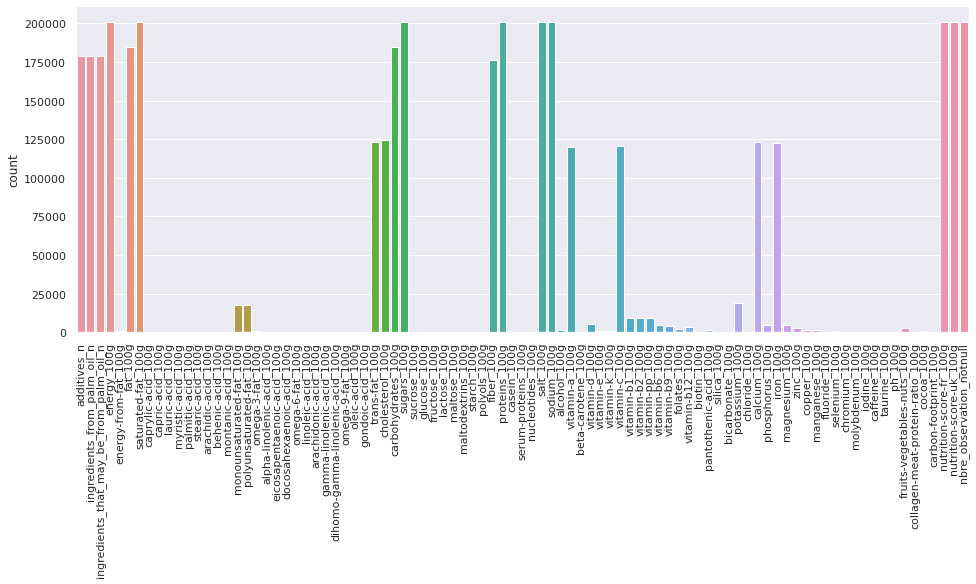

In [57]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
ax = sns.countplot(data=df)

path_complet = os.path.join(graph_path, "missing_data_1.jpg")
plt.savefig(path_complet, dpi=300, bbox_inches='tight')


In [58]:
#Nombre de valeurs non nul:
val_ok = df.notnull().sum().sum()
print(val_ok)

6991851


In [59]:
#Nombre de valeurs nul:
val_nok = df.isnull().sum().sum()
print(val_nok)

14712477


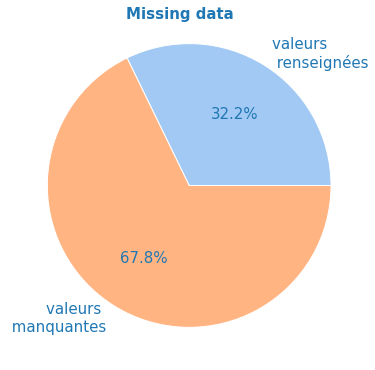

In [79]:
fig , ax = plt.subplots(figsize =(6,6))

colors = sns.color_palette('pastel')

fig.suptitle("Missing data", fontsize=15, color='tab:blue', fontweight="bold", y =0.90)
fig.tight_layout()

labels = ['valeurs \n renseignées', 'valeurs \n manquantes']

ax.pie([val_ok, val_nok],colors = colors, labels = labels, shadow = False,
       autopct='%1.1f%%', textprops={'fontsize': 15,'color':"tab:blue"})


ax.explode = (0.1, 0.1)


path_complet = os.path.join(graph_path, "missing_data_pie1.jpg")
plt.savefig(path_complet, dpi=300, bbox_inches='tight')
plt.show()

In [61]:
df.shape

(200966, 108)

In [62]:
df.to_csv('/home/bryan/OpenClassRoom/Projet_1/data/df_clean.csv')

In [63]:
df_col_suppression = pd.DataFrame({'Nbre observations' : [320772,320772,281657,203026], 
                                   'Transformation' :['N Debut','Etape 1', 'Etape 2','Etape 3']})
df_col_suppression.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nbre observations  4 non-null      int64 
 1   Transformation     4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [64]:
320772-281657

39115

In [65]:
df_col_suppression

,Nbre observations,Transformation
0,320772,N Debut
1,320772,Etape 1
2,281657,Etape 2
3,203026,Etape 3


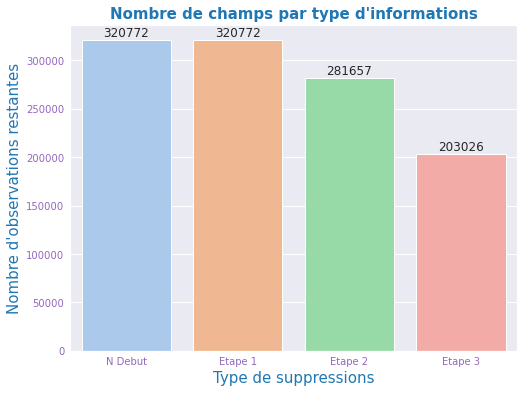

In [66]:
fig , ax = plt.subplots(1,1, figsize =(8,6))

ax = sns.barplot(y = 'Nbre observations',x ='Transformation', data = df_col_suppression)
sns.set_theme(palette="pastel")
plt.title("Nombre de champs par type d'informations", fontsize=15, color='tab:blue', fontweight="bold")
plt.ylabel("Nombre d'observations restantes", size = 15,color='tab:blue')
plt.xlabel("Type de suppressions", size = 15,color='tab:blue')
ax.tick_params(pad = 0, labelsize=10, colors='tab:purple')
for container in ax.containers:
        ax.bar_label(container, padding=1)
path_complet = os.path.join(graph_path, "sup_obsv.jpg")
fig.savefig(path_complet, dpi=300, bbox_inches='tight')

<AxesSubplot:>

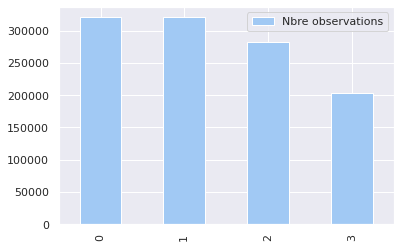

In [67]:
df_col_suppression.plot(kind='bar', stacked=True)

In [68]:
df_test = df[['pnns_groups_1', 'pnns_groups_2']].groupby('pnns_groups_1')

In [69]:
df['pnns_groups_1'].unique()

array(['unknown', 'fruits and vegetables', 'sugary snacks',
       'composite foods', 'beverages', 'fish meat eggs', 'fat and sauces',
       'cereals and potatoes', 'milk and dairy products', 'salty snacks'],
      dtype=object)

In [70]:
X = df['pnns_groups_1']
Y = df['pnns_groups_2']
data_crosstab = pd.crosstab(X, Y,dropna =True)
df_crosstab = pd.DataFrame(data_crosstab)
df_crosstab

pnns_groups_2,alcoholic beverages,appetizers,artificially sweetened beverages,biscuits and cakes,bread,breakfast cereals,cereals,cheese,chocolate products,dairy desserts,...,potatoes,processed meat,salty and fatty products,sandwich,soups,sweetened beverages,sweets,tripe dishes,unknown,vegetables
pnns_groups_1,,,,,,,,,,,,,,,,,,,,,
beverages,0,0,194,0,0,0,0,0,0,0,...,0,0,0,0,0,1389,0,0,0,0
cereals and potatoes,0,0,0,0,1396,1160,3117,0,0,0,...,75,0,0,0,0,0,0,0,0,0
composite foods,0,0,0,0,0,0,0,0,0,0,...,0,0,0,613,0,0,0,0,0,0
fat and sauces,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fish meat eggs,0,0,0,0,0,0,0,0,0,0,...,0,2177,0,0,0,0,0,0,0,0
fruits and vegetables,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,375,0,0,0,0,2046
milk and dairy products,0,0,0,0,0,0,0,2773,0,661,...,0,0,0,0,0,0,0,0,0,0
salty snacks,0,1683,0,0,0,0,0,0,0,0,...,0,0,16,0,0,0,0,0,0,0
sugary snacks,0,0,0,3684,0,0,0,0,2323,0,...,0,0,0,0,0,0,2893,0,0,0


In [71]:
for j in df['pnns_groups_1'].unique():
    for i in df['pnns_groups_2'][df['pnns_groups_1']==j].unique():
        print(j, "-",i)

unknown - unknown
unknown - alcoholic beverages
unknown - tripe dishes
fruits and vegetables - vegetables
fruits and vegetables - soups
fruits and vegetables - fruits
fruits and vegetables - dried fruits
sugary snacks - biscuits and cakes
sugary snacks - sweets
sugary snacks - chocolate products
sugary snacks - pastries
composite foods - pizza pies and quiche
composite foods - one dish meals
composite foods - sandwich
beverages - sweetened beverages
beverages - non sugared beverages
beverages - fruit juices
beverages - artificially sweetened beverages
beverages - fruit nectars
fish meat eggs - meat
fish meat eggs - eggs
fish meat eggs - fish and seafood
fish meat eggs - processed meat
fat and sauces - dressings and sauces
fat and sauces - fats
cereals and potatoes - cereals
cereals and potatoes - bread
cereals and potatoes - legumes
cereals and potatoes - breakfast cereals
cereals and potatoes - potatoes
milk and dairy products - milk and yogurt
milk and dairy products - cheese
milk an

In [72]:
for col in df.columns:
    print(col)

code
product_name
brands_tags
categories_tags
origins
labels_tags
countries
ingredients_text
allergens
traces_fr
serving_size
additives_n
additives_tags
ingredients_from_palm_oil_n
ingredients_that_may_be_from_palm_oil_n
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states_tags
main_category_fr
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
caprylic-acid_100g
capric-acid_100g
lauric-acid_100g
myristic-acid_100g
palmitic-acid_100g
stearic-acid_100g
arachidic-acid_100g
behenic-acid_100g
montanic-acid_100g
monounsaturated-fat_100g
polyunsaturated-fat_100g
omega-3-fat_100g
alpha-linolenic-acid_100g
eicosapentaenoic-acid_100g
docosahexaenoic-acid_100g
omega-6-fat_100g
linoleic-acid_100g
arachidonic-acid_100g
gamma-linolenic-acid_100g
dihomo-gamma-linolenic-acid_100g
omega-9-fat_100g
oleic-acid_100g
gondoic-acid_100g
trans-fat_100g
cholesterol_100g
carbohydrates_100g
sugars_100g
sucrose_100g
glucose_100g
fructose_100g
lactose_100g
maltose_100g
maltodextrins_100g
starch_100g
po

In [73]:
#graphique variables consistantes:
df_vc = pd.DataFrame({'Nbre de champs' : [108,96,6,6], 
                      'Type information' :['Total','info-nutri', 'info-reglementaire','Autres']})

In [74]:
df_vc

,Nbre de champs,Type information
0,108,Total
1,96,info-nutri
2,6,info-reglementaire
3,6,Autres


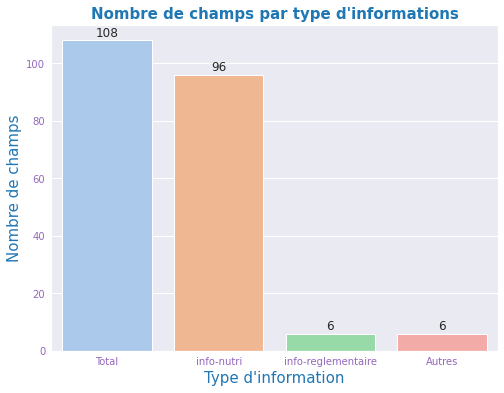

In [75]:
fig , ax = plt.subplots(1,1, figsize =(8,6))

ax = sns.barplot(y = 'Nbre de champs', x ='Type information', data = df_vc)
sns.set_theme(palette="pastel")
plt.title("Nombre de champs par type d'informations", fontsize=15, color='tab:blue', fontweight="bold")
plt.ylabel("Nombre de champs", size = 15,color='tab:blue')
plt.xlabel("Type d'information", size = 15,color='tab:blue')
ax.tick_params(pad = 0, labelsize=10, colors='tab:purple')
for container in ax.containers:
        ax.bar_label(container, padding=1)
path_complet = os.path.join(graph_path, "choix_col.jpg")
fig.savefig(path_complet, dpi=300, bbox_inches='tight')

In [76]:
df_vc.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nbre de champs    4 non-null      int64 
 1   Type information  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [77]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200966 entries, 0 to 200965
Data columns (total 108 columns):
 #    Column                                   Non-Null Count   Dtype  
---   ------                                   --------------   -----  
 0    code                                     200966 non-null  object 
 1    product_name                             200966 non-null  object 
 2    brands_tags                              200966 non-null  object 
 3    categories_tags                          200966 non-null  object 
 4    origins                                  200966 non-null  object 
 5    labels_tags                              200966 non-null  object 
 6    countries                                200966 non-null  object 
 7    ingredients_text                         200966 non-null  object 
 8    allergens                                22762 non-null   object 
 9    traces_fr                                200966 non-null  object 
 10   serving_size      

In [78]:
df.shape

(200966, 108)